In [1]:
import pandas as pd

# Load the data from the Excel file
file_path = '/content/New Microsoft Excel Worksheet.xlsx'
df = pd.read_excel(file_path, sheet_name=None)

# Display the sheet names and the first few rows of the relevant sheet (if any)
sheet_names = df.keys()
df

{'Sheet1':       slno           grp  Round_Centre  FSU_number  Round  Schedule_Number  \
 0    45494  7.100000e+31             1       70974     68               10   
 1    45495  7.100000e+31             1       70974     68               10   
 2    45496  7.100000e+31             1       70974     68               10   
 3    45497  7.100000e+31             1       70974     68               10   
 4    45498  7.100000e+31             1       70974     68               10   
 ..     ...           ...           ...         ...    ...              ...   
 939  46433  7.110000e+31             1       71098     68               10   
 940  46434  7.110000e+31             1       71098     68               10   
 941  46435  7.110000e+31             1       71098     68               10   
 942  46436  7.110000e+31             1       71098     68               10   
 943  46437  7.110000e+31             1       71098     68               10   
 
      Sample  Sector  state  State_Regio

Dataset Information:
Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)
    slno           grp  Round_Centre  FSU_number  Round  Schedule_Number  \
0  45494  7.100000e+31             1       70974     68               10   
1  45495  7.100000e+31             1       70974     68               10   
2  45496  7.100000e+31             1       70974     68               10   
3  45497  7.100000e+31             1       70974     68               10   
4  45498  7.100000e+31             1       70974     68               10   

   Sample  Sector  state  State_Region  ...  pickle_v  sauce_jam_v  \
0       1       1     33           334  ...   0.00000          0.0   
1       1       1     33           334

<ipython-input-4-739be2379e13>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apnew['Meals_At_Home'].fillna(apnew['Meals_At_Home'].mean(), inplace=True)


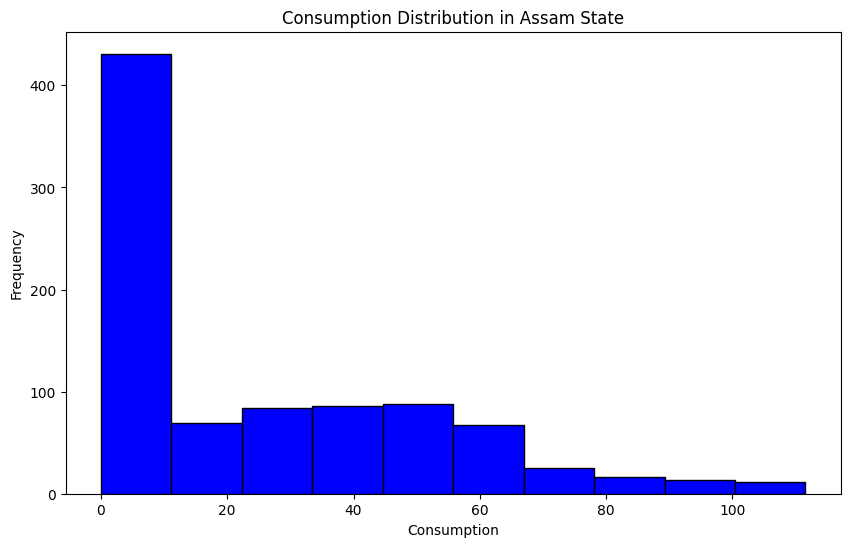

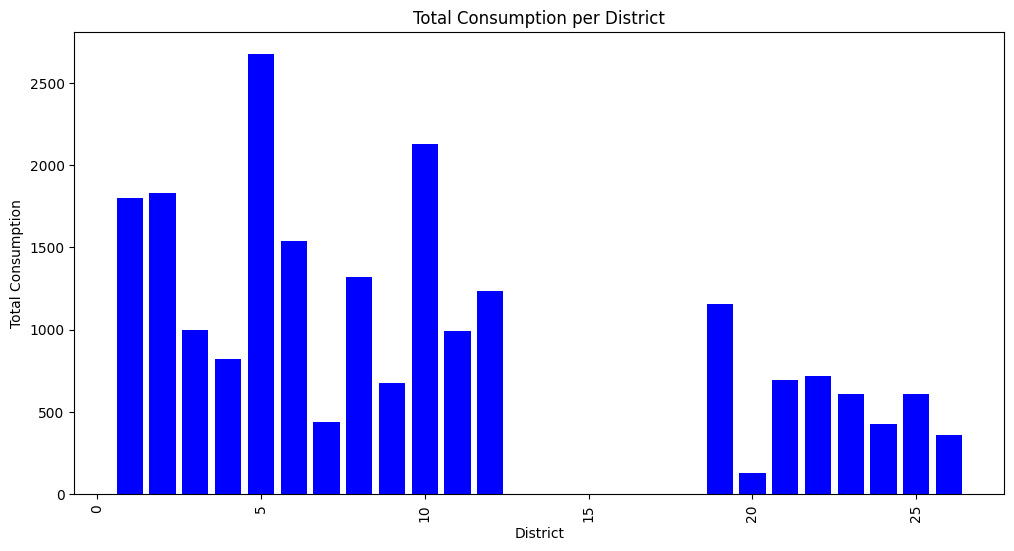

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the provided Excel file
file_path = '/content/New Microsoft Excel Worksheet.xlsx'
data = pd.read_excel(file_path)

# Display dataset info
print("Dataset Information:")
print(data.columns)
print(data.head())
print(data.shape)

# Finding missing values
missing_info = data.isnull().sum()
print("Missing Values Information:")
print(missing_info)

# Subsetting the data for analysis
apnew = data[['District', 'Meals_At_Home', 'ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q', 'No_of_Meals_per_day']]

# Impute missing values with mean for specific columns
apnew['Meals_At_Home'].fillna(apnew['Meals_At_Home'].mean(), inplace=True)

# Finding outliers and removing them
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - (1.5 * IQR)
    upper_threshold = Q3 + (1.5 * IQR)
    df = df[(df[column_name] >= lower_threshold) & (df[column_name] <= upper_threshold)]
    return df

outlier_columns = ['ricepds_v', 'chicken_q']
for col in outlier_columns:
    apnew = remove_outliers(apnew, col)

# Summarize consumption
apnew['total_consumption'] = apnew[['ricepds_v', 'Wheatpds_q', 'chicken_q', 'pulsep_q', 'wheatos_q']].sum(axis=1)

# Summarize and display top consuming districts
district_summary = apnew.groupby('District')['total_consumption'].sum().reset_index().sort_values(by='total_consumption', ascending=False)

print("Top Consuming Districts:")
print(district_summary.head(4))

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(apnew['total_consumption'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Consumption')
plt.ylabel('Frequency')
plt.title('Consumption Distribution in Assam State')
plt.show()

# Aggregate total consumption by district
AP_consumption = apnew.groupby('District')['total_consumption'].sum().reset_index()

# Plot barplot
plt.figure(figsize=(12, 6))
plt.bar(AP_consumption['District'], AP_consumption['total_consumption'], color='blue')
plt.xlabel('District')
plt.ylabel('Total Consumption')
plt.title('Total Consumption per District')
plt.xticks(rotation=90)
plt.show()

